In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
# Importing the dataset
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Business Understanding
We have the famous Titanic Dataset on which we have to predict the survival of passengers
With the following data we can check

1) Survival rate of gender.

2) Which passenger class survived the most.

3) How gender was distributed class wise.

4) How age was distributed class wise.

5) Avg fare of each class.

6) Survival by age


## Data Understanding

In [4]:
# This is the train data shape (Rows,Columns)
train_df.shape

(891, 12)

In [5]:
# This is the train data info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# This is the train data description
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# This is the train data head
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
# This is the test data shape (Rows,Columns)
test_df.shape

(418, 11)

In [9]:
# This is the test data info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# This is the test data description
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
# This is the test data head
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data preparation

There are not much data values that are missing or outliers so I choose to merge the test and train data for getting an overview of the complete dataset

In [12]:
merged_df= pd.concat([train_df,test_df])

## Modeling data

## Passengers by gender



male      843
female    466
Name: Sex, dtype: int64

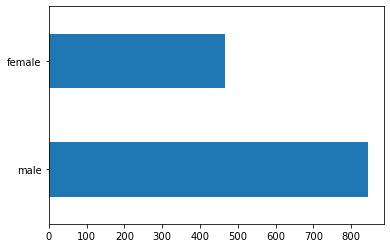

In [13]:
merged_df['Sex'].value_counts().plot(kind='barh');
merged_df['Sex'].value_counts()


So from the above graph it is clear that there were way more male passenger(843) than female passenger(466)

## 1) Survival rate of gender.

In [14]:
f_t=train_df[(train_df.Sex=='female')].shape[0]
f_1=train_df[(train_df.Sex=='female') & (train_df.Survived==1)].shape[0]
f_0=train_df[(train_df.Sex=='female') & (train_df.Survived==0)].shape[0]

m_t=train_df[(train_df.Sex=='male')].shape[0]
m_0=train_df[(train_df.Sex=='male') & (train_df.Survived==0)].shape[0]
m_1=train_df[(train_df.Sex=='male') & (train_df.Survived==1)].shape[0]

print('Total female passengers ',f_t,' survived female ',f_1,' female survived passengers ',f_1*100/f_t)
print('Total male passengers ',m_t,' survived male ',m_1,' male survived passengers ',m_1*100/m_t)


Total female passengers  314  survived female  233  female survived passengers  74.20382165605096
Total male passengers  577  survived male  109  male survived passengers  18.890814558058924


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Legend does not support 314 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Legend does not support 233 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Legend does not support 81 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


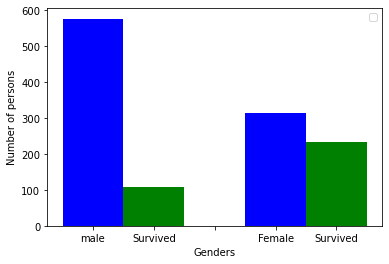

In [22]:
ax = plt.subplot()
w = 0.1
ax.bar(4*w, f_t, width=w, color='b', align='center'),
ax.bar(5*w, f_1, width=w, color='g', align='center'),
#ax.bar(3*w, f_0, width=w, color='r', align='center'),

ax.bar(w, m_t, width=w, color='b', align='center'),
ax.bar(2*w, m_1, width=w, color='g', align='center'),
#ax.bar(7*w, m_0, width=w, color='r', align='center')



ax.set_ylabel('Number of persons')
#ax.set_xticks(ind+width)
ax.set_xticklabels( ('','male','Survived' ,'','Female','Survived') )
ax.legend( (f_t, f_1, f_0), ('Total', 'Survived', 'Died') )

plt.show()

## 2) Which passenger class survived the most.

In [16]:
train_df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

## 3) How Passengers was distributed class wise.


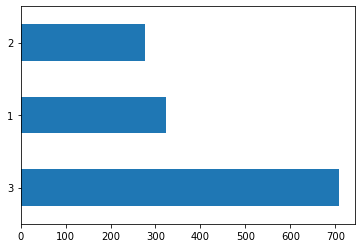

In [17]:
merged_df.Pclass.value_counts().plot(kind="barh");


## 4) How age was distributed class wise.


In [18]:
merged_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


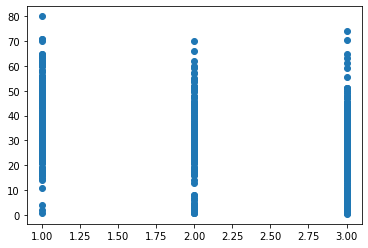

In [19]:
plt.scatter(train_df.Pclass,train_df.Age);


## 5) Avg fare of each class.

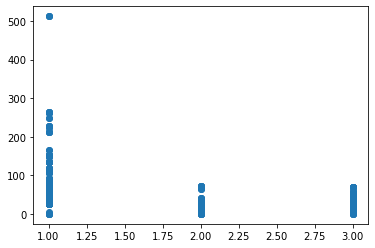

In [20]:
plt.scatter(train_df.Pclass,train_df.Fare);